#Predicting Defaulters in Bank Indessa

This notebook looks into using various Python-based ML and Data Science libraries in an attempt to build a Machine Learning
model capable of predicting the probability that a member will default based on their attributes.<br>

We're going to take the following approach:<br>
1. Problem Definition<br>
2. EDA and Data Preprocessing<br>
3. Data Engineering<br>
4. Modelling <br>
5. Evaluation<br>


##1.Problem Statement<br>
The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets)
have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock
has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With
the messy data collected over all the years, this bank has decided to use machine learning to figure
out a way to find these defaulters and devise a plan to reduce them.
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied
for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan
application. Keep this in mind while understanding data.
In this challenge, you will help this bank by predicting the probability that a member will default.

## 2. Data

This data set comprises information captured in December
2016.<br>
Data Set Description<br>


1)member_id - unique ID assigned to each member<br>
2)loan_amnt - loan amount  applied by the member<br>
3)funded_amnt - loan amount sanctioned by the bank<br>
4)funded_amnt_inv - loan amount sanctioned by the investors<br>
5)term - term of loan (in months)<br>
6)batch_enrolled - batch numbers allotted to members<br>
7)int_rate - interest rate (%) on loan<br>
8)grade - grade assigned by the bank<br>
9)sub_grade - grade assigned by the bank<br>
10)emp_title  - job / Employer title of member<br>
11)emp_length - employment length, where 0 means less than one year and 10 means ten or more years<br>
12)home_ownership - status of home ownership<br>
13)annual_inc - annual income ($) reported by the member<br>
14)verification_status - status of income verified by the bank<br>
15)pymnt_plan - indicates if any payment plan has started against loan<br>
16)desc - loan description provided by member<br>
17)purpose - purpose of loan<br>
18)title - loan title provided by member<br>
19)zip_code - first three digits of area zipcode of member<br>
20)addr_state - living state of member<br>
21)dti - ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income<br>
22)delinq_2yrs  - number of 30+ days delinquency in past 2 years<br>
23)inq_last_6mths - number of inquiries in last 6 months<br>
24)mths_since_last_delinq - number of months since last delinq<br>
25)mths_since_last_record - number of months since last public record<br>
26)open_acc - number of open credit line in member's credit line<br>
27)pub_rec - number of derogatory public records<br>
28)revol_bal - total credit revolving balance<br>
29)revol_util - amount of credit a member is using relative to revol_bal<br>
30)total_acc - total number of credit lines available in members credit line<br>
31)initial_list_status - unique listing status of the loan - W(Waiting), F(Forwarded)<br>
32)total_rec_int - interest received till date<br>
33)total_rec_late_fee - Late fee received till date<br>
34)recoveries - post charge off gross recovery<br>
35)collection_recovery_fee - post charge off collection fee<br>
36)collections_12_mths_ex_med - number of collections in last 12 months excluding medical collections<br>
37)mths_since_last_major_derog - months since most recent 90 day or worse rating<br>
38)application_type - indicates when the member is an individual or joint<br>
39)verification_status_joint - indicates if the joint members income was verified by the bank<br>
40)last_week_pay - indicates how long (in weeks) a member has paid EMI after batch enrolled<br>
41)acc_now_delinq - number of accounts on which the member is delinquent<br>
42)tot_coll_amt - total collection amount ever owed<br>
43)tot_cur_bal - total current balance of all accounts<br>
44)total_rev_hi_lim - total revolving credit limit<br>
45)loan_status - status of loan amount, 1 = Defaulter, 0 = Non Defaulters




## Preparing the tools
 
**We are going to use :-**

* Pandas & Numpy for Data Analysis and Manipulation


* Matplotlib and Seaborn for Data Visualisation


* Scikit-Learn for the Modeling building and Reports

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [191]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,plot_roc_curve


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### Importing the dataset

In [192]:
#import the training and testing dataset
df_train = pd.read_csv('/content/drive/MyDrive/train_indessa.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_indessa.csv')

### Shape of the dataset (Rows, Columns)

In [193]:
df_train.shape


(532428, 45)

In [194]:
df_test.shape

(354951, 44)

In [195]:
#df_train.drop(['desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled','addr_state','pub_rec','delinq_2yrs'.'inq_last_6mths','pub_rec'], axis=1, inplace=True)

### Head of the dataset

In [196]:
#First 5 records of the training dataset
df_train.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [197]:
#First 5 records of the testing dataset
df_test.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


<br><br>
# Exploratory Data analysis
<br>

### Information about the data

In [198]:
#info about the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [199]:
#info about the testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

### Description about the dataset

In [200]:
#description of the training dataset
df_train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [201]:
#description about the testing dataset
df_test.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,54930.000000,354938.000000,354938.000000,3.549510e+05,354736.00000,354938.000000,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,70.155034,11.552781,0.195981,1.692005e+04,55.08345,25.269030,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,28.111218,5.326112,0.579484,2.243219e+04,23.80570,11.836602,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.441000e+03,37.70000,17.000000,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187300e+04,56.00000,24.000000,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.081100e+04,73.60000,32.000000,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,76.000000,54.000000,2.904836e+06,182.80000,169.000000,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


### Are there any missing values?

In [202]:
#Checking for null values in training data
print(df_train.isnull().sum())

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [203]:
#Checking for null values in testing data
print(df_test.isnull().sum())

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

### Checking unique values in dataset

In [204]:
#To check the number of unique values in each column
for col in df_train.columns:
  print(col,": ",len(df_train[col].unique()))

member_id :  532428
loan_amnt :  1370
funded_amnt :  1370
funded_amnt_inv :  6442
term :  2
batch_enrolled :  105
int_rate :  535
grade :  7
sub_grade :  35
emp_title :  190125
emp_length :  12
home_ownership :  6
annual_inc :  33989
verification_status :  3
pymnt_plan :  2
desc :  70639
purpose :  14
title :  39694
zip_code :  917
addr_state :  51
dti :  4058
delinq_2yrs :  27
inq_last_6mths :  24
mths_since_last_delinq :  148
mths_since_last_record :  123
open_acc :  74
pub_rec :  29
revol_bal :  63459
revol_util :  1266
total_acc :  127
initial_list_status :  2
total_rec_int :  243149
total_rec_late_fee :  4073
recoveries :  14024
collection_recovery_fee :  12617
collections_12_mths_ex_med :  10
mths_since_last_major_derog :  163
application_type :  2
verification_status_joint :  4
last_week_pay :  98
acc_now_delinq :  9
tot_coll_amt :  8082
tot_cur_bal :  251641
total_rev_hi_lim :  14698
loan_status :  2


In [205]:
#To check the number of unique values in each column
for col in df_test.columns:
  print(col,": ",len(df_test[col].unique()))

member_id :  354951
loan_amnt :  1365
funded_amnt :  1365
funded_amnt_inv :  4840
term :  2
batch_enrolled :  105
int_rate :  533
grade :  7
sub_grade :  35
emp_title :  135103
emp_length :  12
home_ownership :  5
annual_inc :  25035
verification_status :  3
pymnt_plan :  2
desc :  47102
purpose :  14
title :  27976
zip_code :  904
addr_state :  51
dti :  4029
delinq_2yrs :  26
inq_last_6mths :  25
mths_since_last_delinq :  136
mths_since_last_record :  123
open_acc :  66
pub_rec :  25
revol_bal :  56301
revol_util :  1221
total_acc :  119
initial_list_status :  2
total_rec_int :  187736
total_rec_late_fee :  2972
recoveries :  9673
collection_recovery_fee :  8770
collections_12_mths_ex_med :  10
mths_since_last_major_derog :  163
application_type :  2
verification_status_joint :  4
last_week_pay :  93
acc_now_delinq :  7
tot_coll_amt :  6611
tot_cur_bal :  196439
total_rev_hi_lim :  10842


## Data Preprocessing

### Term Feature

In [206]:
# Replaces months string with '' 
df_train['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
df_train['term'] = pd.to_numeric(df_train['term'], errors='coerce')

In [207]:
# Replaces months string with '' 
df_test['term'].replace(to_replace=' months', value='', regex=True, inplace=True) 

# Convert it to numeric
df_test['term'] = pd.to_numeric(df_test['term'], errors='coerce')

### Loan amount feature

In [208]:
# replace $ with ''
df_train['loan_amnt'].replace('$', '', inplace=True)

In [209]:
# replace $ with ''
df_test['loan_amnt'].replace('$', '', inplace=True)

###Employment Length Feature

In [210]:
# replace years with ''
df_train['emp_length'].replace('n/a', '0', inplace=True)
df_train['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df_train['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df_train['emp_length'] = pd.to_numeric(df_train['emp_length'], errors='coerce')

In [211]:
# replace years with ''
df_test['emp_length'].replace('n/a', '0', inplace=True)
df_test['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df_test['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
df_test['emp_length'] = pd.to_numeric(df_test['emp_length'], errors='coerce')

### Last week pay feature

In [212]:
# replace th week with ''
df_train['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df_train['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df_train['last_week_pay'] = pd.to_numeric(df_train['last_week_pay'], errors='coerce')

In [213]:
# replace th week with ''
df_test['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)

df_test['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
df_test['last_week_pay'] = pd.to_numeric(df_test['last_week_pay'], errors='coerce')

### sub grade feature

In [214]:
# replace with alphabets with numeric
df_train['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df_train['sub_grade'] = pd.to_numeric(df_train['sub_grade'], errors='coerce')



In [215]:
# replace with alphabets with numeric
df_test['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df_test['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df_test['sub_grade'] = pd.to_numeric(df_test['sub_grade'], errors='coerce')

### Verification status joint feature

In [216]:
# removing the spaces
df_train['verification_status_joint'].replace(to_replace='Not Verified', value='NotVerified', regex=True, inplace=True)
df_train['verification_status_joint'].replace(to_replace='Verified', value='Verified', regex=True, inplace=True)
df_train['verification_status_joint'].replace(to_replace='Source Verified', value='SourceVerified', regex=True, inplace=True)

In [217]:
# removing the spaces
df_test['verification_status_joint'].replace(to_replace='Not Verified', value='NotVerified', regex=True, inplace=True)
df_test['verification_status_joint'].replace(to_replace='Verified', value='Verified', regex=True, inplace=True)
df_test['verification_status_joint'].replace(to_replace='Source Verified', value='SourceVerified', regex=True, inplace=True)

### verification status feature

In [218]:
# removing the spaces
df_train['verification_status'].replace(to_replace='Source Verified', value='SourceVerified', regex=True, inplace=True)
df_train['verification_status'].replace(to_replace='Verified', value='Verified', regex=True, inplace=True)
df_train['verification_status'].replace(to_replace='Not Verified', value='NotVerified', regex=True, inplace=True)

In [219]:
# removing the spaces
df_test['verification_status'].replace(to_replace='Source Verified', value='SourceVerified', regex=True, inplace=True)
df_test['verification_status'].replace(to_replace='Verified', value='Verified', regex=True, inplace=True)
df_test['verification_status'].replace(to_replace='Not Verified', value='NotVerified', regex=True, inplace=True)

In [220]:
#Replacing Any with none
df_train['home_ownership'].replace(to_replace='ANY', value='NONE', regex=True, inplace=True)

### Home Ownership feature

## Dropping the least least important columns 

In [221]:
#dropping the columns in training dataset
df_train.drop(['desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled','addr_state','pub_rec'], axis=1, inplace=True)

In [222]:
#dropping the columns in testing dataset
df_test.drop(['desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled','addr_state','pub_rec'], axis=1, inplace=True)

### Filling the Null values

In [223]:
# Filling NaN values with median of each column present in columns
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)
  
     
# Filling NaN values with median of each column present in columns
  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
            'grade', 'verification_status_joint', 'verification_status',
        'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']
for col in num_cols:
    df_train[col].fillna(0, inplace=True)        
    df_test[col].fillna(0, inplace=True)



### Correlation of the dataset

In [224]:
#Correlation of the training Dataset
df_train.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
member_id,1.000000,0.065607,0.067888,0.073426,0.069739,-0.141030,-0.008113,0.012022,0.034650,0.134179,0.049956,-0.127644,0.001069,-0.059205,0.087968,0.035607,-0.053273,0.030647,-0.461192,-0.075700,-0.113868,-0.072498,0.051465,0.026645,-0.788308,0.017609,0.036940,0.050545,0.067343,-0.489753
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.411912,0.145037,0.154600,0.102137,0.330655,0.041866,-0.000454,-0.033693,-0.027906,-0.004528,0.197629,0.333944,0.119901,0.220703,0.532580,0.031374,0.073326,0.052995,-0.014801,-0.018171,-0.045322,0.003198,-0.016197,0.323871,0.301488,-0.095713
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.411001,0.145222,0.154374,0.102376,0.330493,0.042699,-0.000171,-0.034298,-0.027853,-0.004525,0.198077,0.333785,0.120452,0.220595,0.531616,0.031022,0.072895,0.052797,-0.014640,-0.018172,-0.048097,0.003300,-0.016041,0.324646,0.302007,-0.097563
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.411672,0.145251,0.152304,0.103881,0.329494,0.044952,0.000280,-0.038378,-0.026314,0.002200,0.198669,0.331935,0.121108,0.220758,0.529116,0.027770,0.071242,0.050261,-0.014206,-0.018112,-0.052512,0.003476,-0.015603,0.325506,0.302312,-0.101877
term,0.069739,0.411912,0.411001,0.411672,1.000000,0.427560,0.449347,0.067279,0.058746,0.104824,-0.000348,-0.003663,-0.004766,0.013584,0.085096,0.091658,0.085896,0.101236,0.381977,0.005276,0.057592,0.035693,-0.003553,-0.003489,-0.033631,0.005257,-0.007796,0.110029,0.064621,-0.130959
int_rate,-0.141030,0.145037,0.145222,0.145251,0.427560,1.000000,0.971275,0.008706,-0.072060,0.163206,0.056767,0.228596,-0.014433,0.010136,-0.009112,-0.035814,0.269280,-0.037462,0.445634,0.056141,0.107292,0.071187,0.013931,-0.006350,0.076154,0.026985,0.004010,-0.083054,-0.155626,0.002590
sub_grade,-0.008113,0.154600,0.154374,0.152304,0.449347,0.971275,1.000000,0.003941,-0.064918,0.173767,0.062264,0.220777,-0.016245,-0.008947,0.000562,-0.029884,0.252746,-0.033644,0.384714,0.053878,0.092796,0.064860,0.020846,-0.001863,-0.024150,0.029210,0.008524,-0.078120,-0.144330,-0.057163
emp_length,0.012022,0.102137,0.102376,0.103881,0.067279,0.008706,0.003941,1.000000,0.062565,0.041306,0.023329,-0.011608,0.002403,0.021035,0.037237,0.084972,0.033902,0.099146,0.067546,-0.010517,0.004319,0.003925,-0.001472,0.002280,-0.008870,0.008410,0.007000,0.099174,0.072987,-0.028005
annual_inc,0.034650,0.330655,0.330493,0.329494,0.058746,-0.072060,-0.064918,0.062565,1.000000,-0.175863,0.047873,0.033426,-0.031468,-0.033613,0.134948,0.297585,0.037219,0.183932,0.127483,0.013254,0.007190,0.006332,-0.003960,-0.018371,-0.028332,0.014906,0.001081,0.406760,0.260666,-0.008598
dti,0.134179,0.041866,0.042699,0.044952,0.104824,0.163206,0.173767,0.041306,-0.175863,1.000000,-0.007164,-0.016029,0.001653,0.026016,0.297182,0.136762,0.178305,0.222403,0.018475,-0.011336,0.002544,0.003708,0.001052,0.014553,-0.102418,0.007269,-0.011767,0.000343,0.073412,-0.134020


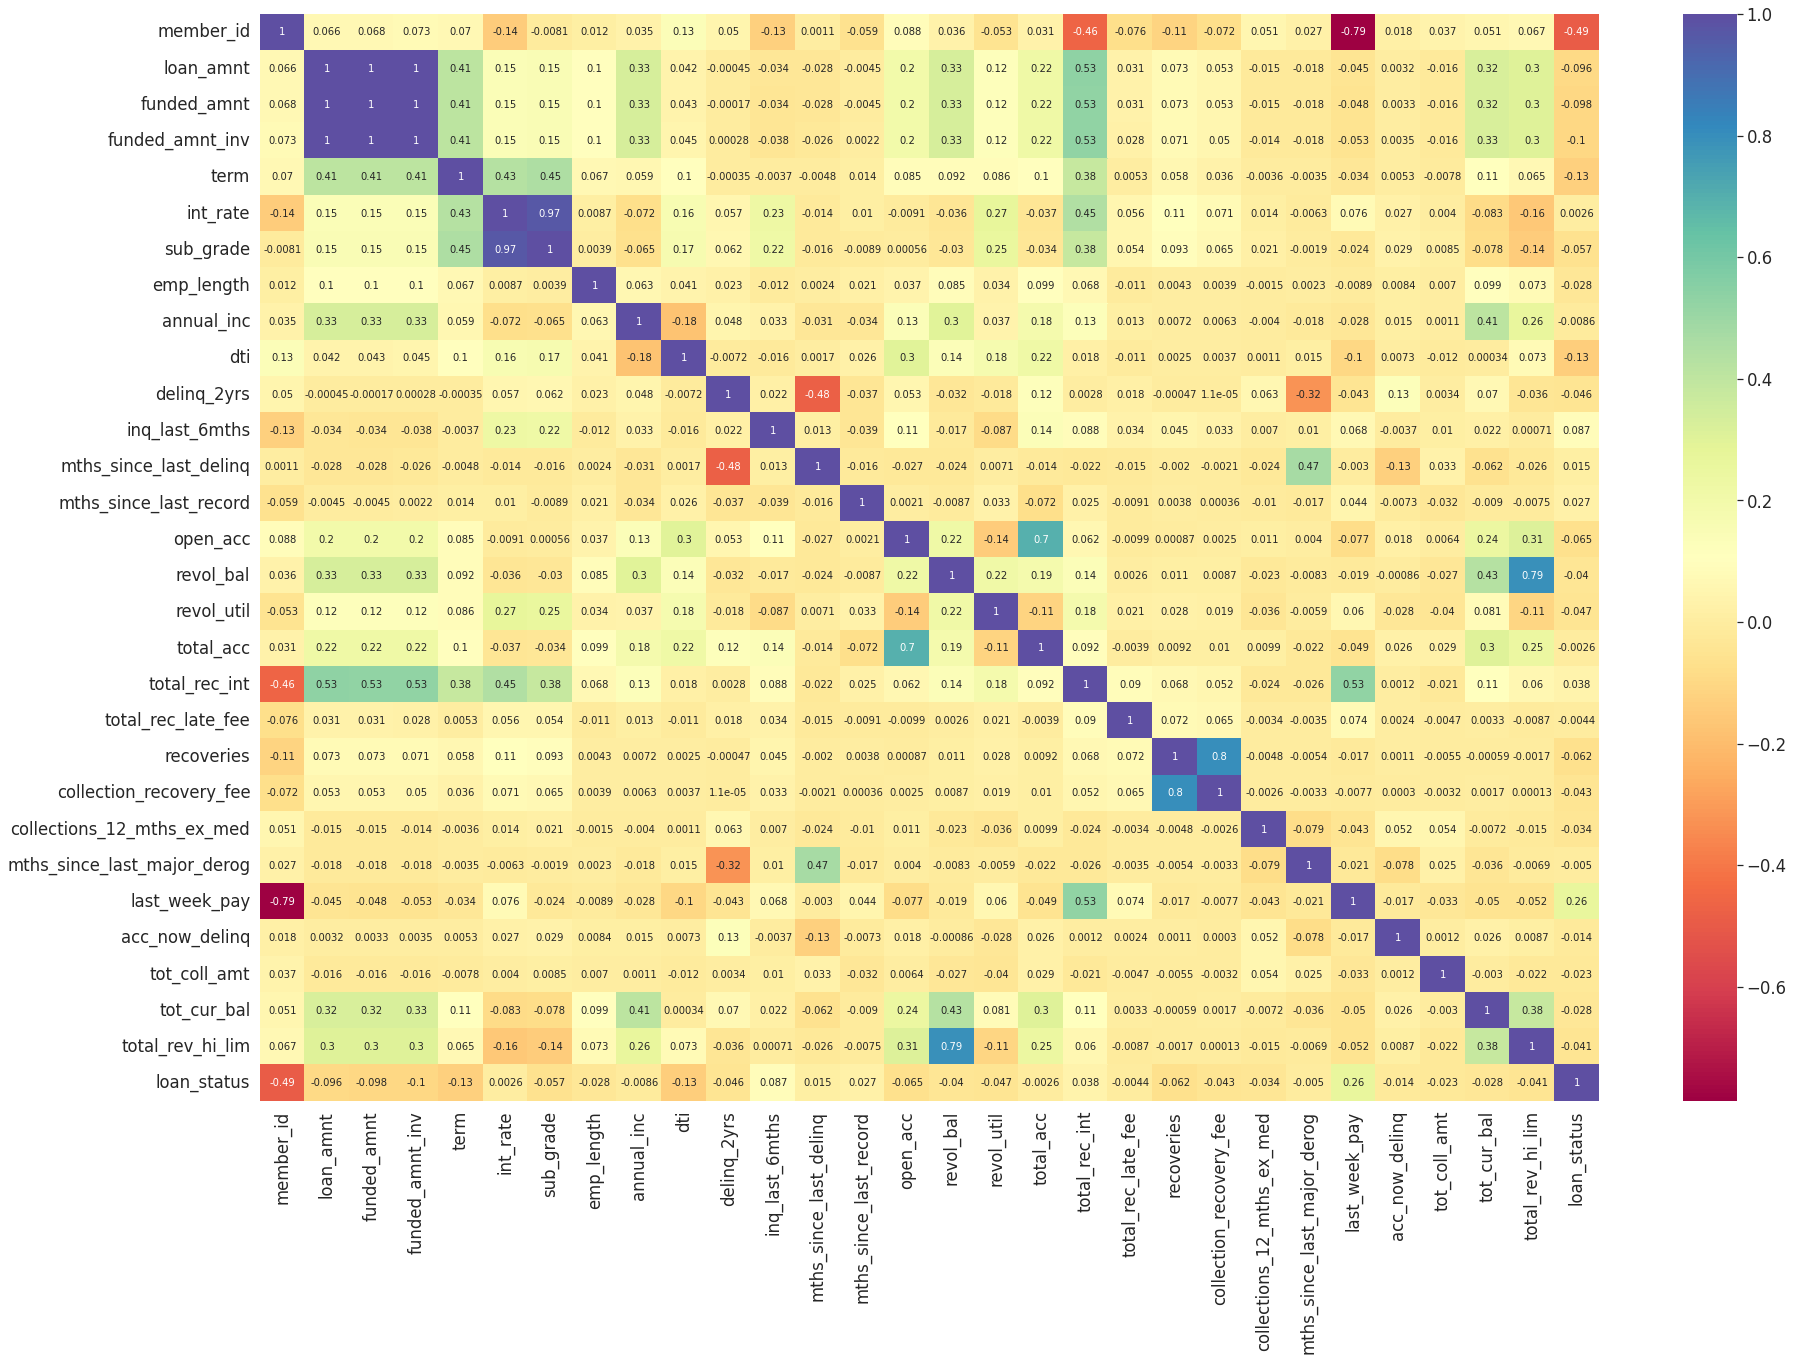

In [225]:
#plotting the heatmap of the training dataset
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True,cmap= 'Spectral')
plt.show()

####In the above correlation heatmap of the training data features like loan amount , funded amount , funded amount by the investors are perfectly correlated and collection fee , interest rate are highly correlated

In [226]:
#Correlation of the testing Data
df_test.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,1.000000,0.062741,0.065052,0.070630,0.067559,-0.143967,-0.011131,0.014035,0.033381,0.048879,0.049827,-0.126678,0.000928,-0.056116,0.090146,0.037630,-0.057252,0.033271,-0.460959,-0.077424,-0.115382,-0.073299,0.051466,0.025718,-0.787270,0.015958,0.003576,0.052797,0.074396
loan_amnt,0.062741,1.000000,0.999242,0.997103,0.411425,0.145004,0.154692,0.105597,0.335861,0.014420,0.000282,-0.034879,-0.027739,-0.003536,0.200812,0.333035,0.118920,0.225540,0.535916,0.031427,0.072886,0.051021,-0.019314,-0.018062,-0.042651,0.005135,-0.002647,0.325761,0.312610
funded_amnt,0.065052,0.999242,1.000000,0.998002,0.410401,0.145069,0.154326,0.105890,0.335523,0.014687,0.000631,-0.035329,-0.027765,-0.003607,0.201345,0.332912,0.119332,0.225540,0.534734,0.031157,0.072377,0.050694,-0.019157,-0.018072,-0.045730,0.005243,-0.002626,0.326577,0.313181
funded_amnt_inv,0.070630,0.997103,0.998002,1.000000,0.410994,0.145138,0.152394,0.107529,0.334404,0.015459,0.001196,-0.039631,-0.026235,0.003650,0.201994,0.331438,0.120084,0.225835,0.532276,0.028249,0.070015,0.048089,-0.018712,-0.018012,-0.050193,0.005468,-0.002562,0.327438,0.313497
term,0.067559,0.411425,0.410401,0.410994,1.000000,0.428803,0.450714,0.067404,0.057778,0.034924,-0.000735,-0.006033,-0.006090,0.012986,0.087669,0.090268,0.084908,0.103354,0.383407,0.003970,0.056835,0.036166,-0.007990,-0.001417,-0.031270,0.004457,-0.001754,0.111563,0.065734
int_rate,-0.143967,0.145004,0.145069,0.145138,0.428803,1.000000,0.971489,0.009601,-0.073901,0.055019,0.052813,0.226240,-0.009595,0.006038,-0.012270,-0.035549,0.268732,-0.040343,0.445744,0.058665,0.106162,0.070386,0.012483,-0.003235,0.075933,0.025706,0.001450,-0.082683,-0.159731
sub_grade,-0.011131,0.154692,0.154326,0.152394,0.450714,0.971489,1.000000,0.005109,-0.066607,0.058880,0.058471,0.219127,-0.011413,-0.012213,-0.002033,-0.029589,0.251641,-0.036414,0.384881,0.054422,0.093377,0.065950,0.018869,0.001015,-0.024400,0.027363,0.001622,-0.077529,-0.147315
emp_length,0.014035,0.105597,0.105890,0.107529,0.067404,0.009601,0.005109,1.000000,0.064481,0.014676,0.026761,-0.009776,-0.001806,0.020396,0.039778,0.086761,0.033568,0.101288,0.069892,-0.007560,0.004020,0.000994,-0.007318,0.001753,-0.009237,0.009023,-0.001522,0.097800,0.080460
annual_inc,0.033381,0.335861,0.335523,0.334404,0.057778,-0.073901,-0.066607,0.064481,1.000000,-0.061567,0.046865,0.037892,-0.030552,-0.032840,0.143663,0.293065,0.035954,0.192556,0.130160,0.013879,0.008523,0.007087,-0.003901,-0.017020,-0.027878,0.014568,0.001794,0.404699,0.263389
dti,0.048879,0.014420,0.014687,0.015459,0.034924,0.055019,0.058880,0.014676,-0.061567,1.000000,-0.001264,-0.005845,-0.001236,0.008409,0.098065,0.046655,0.061027,0.073566,0.005093,-0.004162,0.000714,0.001836,-0.000992,0.001401,-0.036558,0.001835,-0.001106,-0.000519,0.026031


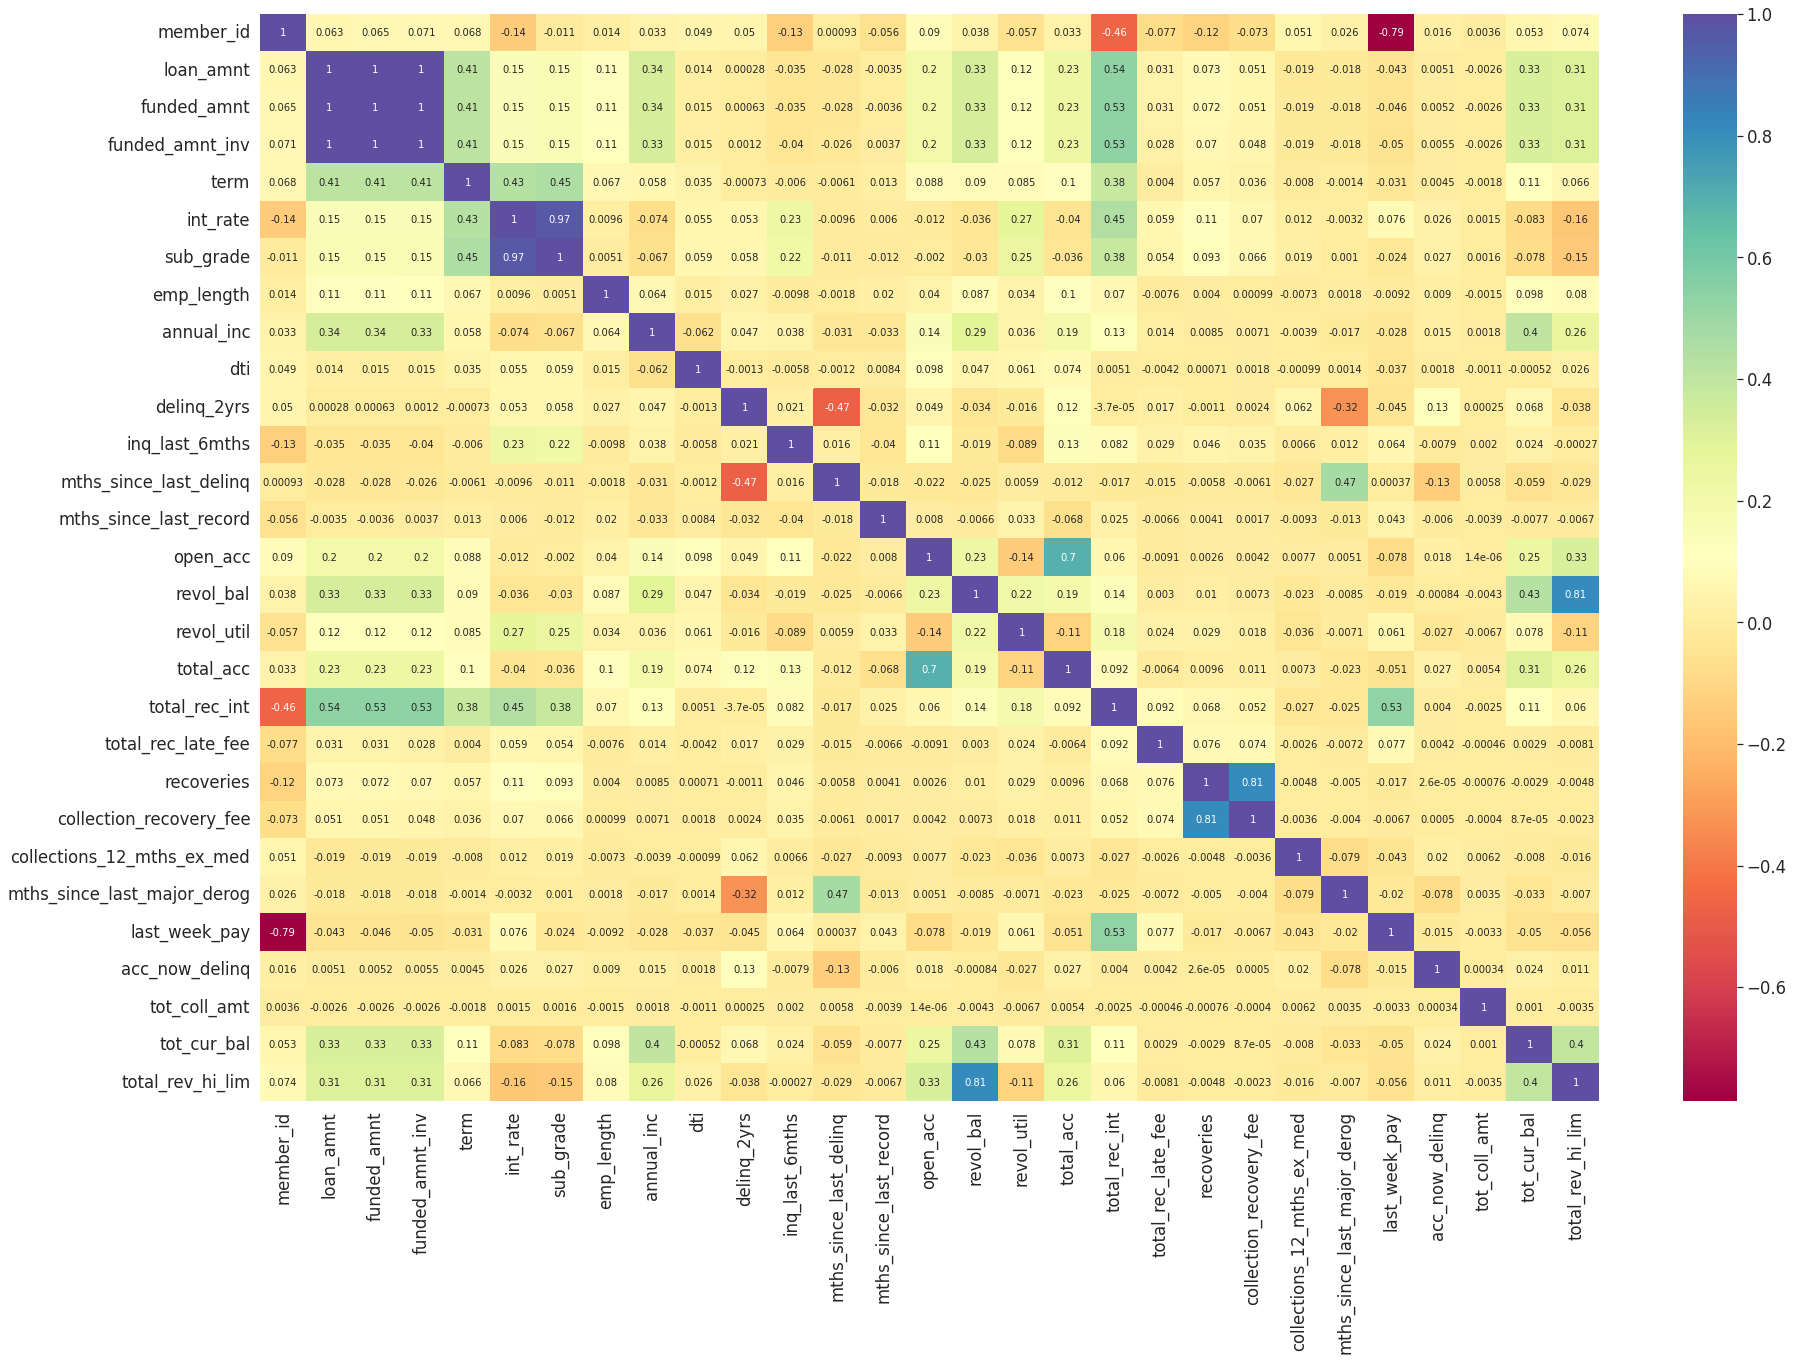

In [227]:
#plotting the heatmap of the testing data
plt.figure(figsize=(30,20))
sns.heatmap(df_test.corr(),annot=True,cmap= 'Spectral')
plt.show()

####In the above correlation heatmap of the testing data features like loan amount , funded amount , funded amount by the investors are perfectly correlated and collection fee , interest rate are highly correlated

### Extracting numerical and categorical columns for value counts

In [228]:
#categorical column in testing data
categorical_column = list(set(df_test.columns) - set(df_test.describe().columns))

In [229]:
#categorical column in training data
categorical_columns = list(set(df_train.columns) - set(df_train.describe().columns))

In [230]:
#categorical column value counts in training data
features = categorical_columns

for col in features:
  s = df_train[col].value_counts()
  print('\n')
  print(s)



debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64


MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            39
Name: home_ownership, dtype: int64


B    152713
C    147499
A     89107
D     83567
E     42495
F     13826
G      3221
Name: grade, dtype: int64


0                 532123
NotVerified          170
Verified             102
SourceVerified        33
Name: verification_status_joint, dtype: int64


n    532420
y         8
Name: pymnt_plan, dtype: int64


f    274018
w    258410
Name: initial_list_status, dtype: int64


INDIVIDUAL    532123
JOINT            305
Name:

In [231]:
#numeric column in testing data
numeric_col = df_test.select_dtypes(include=np.number).columns.tolist()


In [232]:
#numeric column in training  data
numeric_cols = df_train.select_dtypes(include=np.number).columns.tolist()

In [233]:
#numeric column value counts in training data
features = numeric_cols

for col in features:
  s = df_train[col].value_counts()
  print('\n')
  print(s)



26216447    1
5308085     1
69615213    1
32908910    1
822758      1
           ..
70434050    1
72529155    1
11699461    1
45260038    1
58720256    1
Name: member_id, Length: 532428, dtype: int64


10000    37175
12000    30126
15000    28420
20000    28196
35000    21728
         ...  
925          1
32050        1
34600        1
900          1
725          1
Name: loan_amnt, Length: 1370, dtype: int64


10000    37118
12000    30069
15000    28345
20000    28085
35000    21650
         ...  
900          1
32050        1
34600        1
725          1
750          1
Name: funded_amnt, Length: 1370, dtype: int64


10000.000000    33676
12000.000000    26981
15000.000000    25025
20000.000000    24198
35000.000000    17671
                ...  
13470.755149        1
3651.255581         1
7093.836559         1
19550.020606        1
684.135130          1
Name: funded_amnt_inv, Length: 6442, dtype: int64


36    372793
60    159635
Name: term, dtype: int64


10.99    20609
9.17     1

###Data visualisation

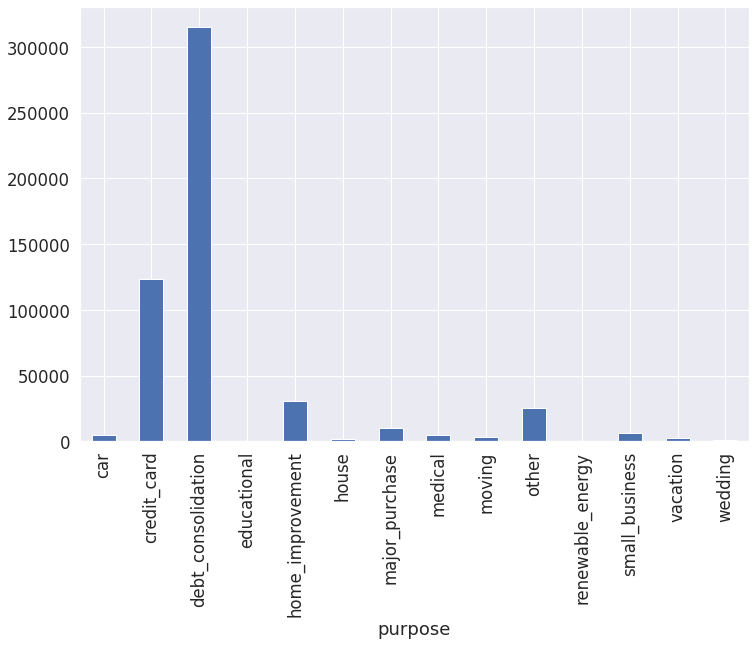

In [234]:
# bar plot of purpose and funded amount
plt.figure(figsize=(12,8))
df_train.groupby('purpose').count()['funded_amnt'].plot(kind='bar')
plt.show()

#### The above graph shows that most of the amount is funded for debt_consolidation , credit card and home improvement

Text(0.5, 1.0, 'interest rate vs term with respect to loan status')

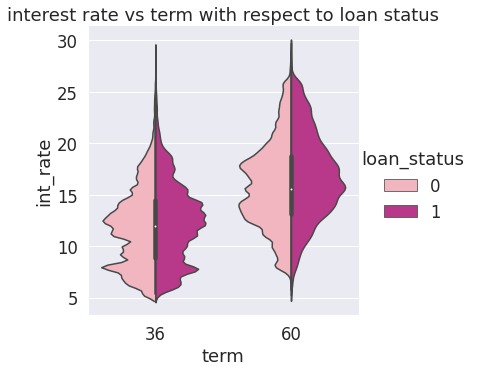

In [235]:
#violen_plot against interest rate vs term with respect to loan status
sns.catplot(data=df_train, kind="violin", x="term", y="int_rate",hue="loan_status", split=True,palette="RdPu")
plt.title("interest rate vs term with respect to loan status")

#### The above violen plot shows that there are many defaulters found as the interest rate increases under the term 60 months

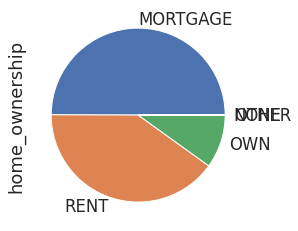

In [236]:
#pieplot on home_ownership categorical values
df_train['home_ownership'].value_counts().plot(kind='pie')

####The above pieplot shows that majority of the loan appliers come under mortgage category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


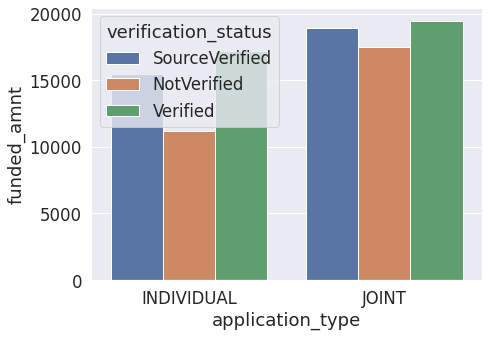

In [237]:
#using barplot to showcase verification status of different application types with respect to funded amount
plt.figure(figsize=(7, 5))
sns.barplot(df_train.application_type, df_train.funded_amnt, hue=df_train.verification_status, ci=None)

#### The above bar plot majority of the individual accounts are verfied for which the loan is funded

In [238]:
#dataframe of loan status and term
pd.crosstab(df_train['loan_status'],df_train['term'])

term,36,60
loan_status,,
0,271120,135481
1,101673,24154


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

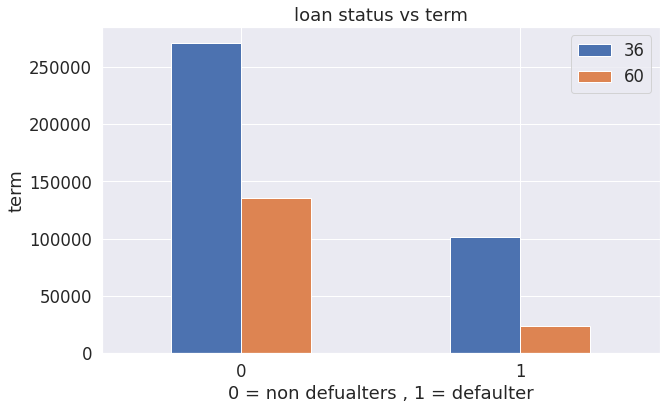

In [239]:
#Create a plot for crosstab

pd.crosstab(df_train['loan_status'],df_train['term']).plot(kind="bar",figsize=(10,6));
plt.title("loan status vs term")
plt.xlabel("0 = non defualters , 1 = defaulter")
plt.ylabel("term")
plt.legend(["36","60"])
plt.xticks(rotation=0)

#### The categorical plot shows that most of the non defaulters are under (36 months) payment term

### Outliers Detection

#### Boxplot visualisation

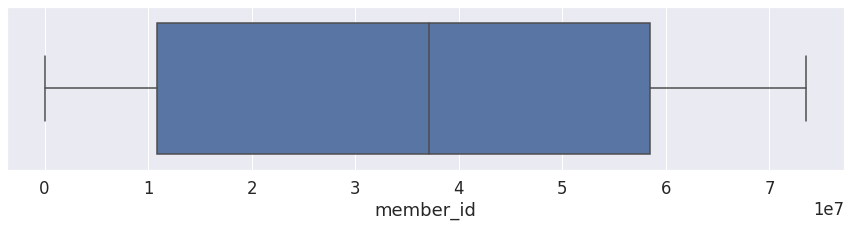

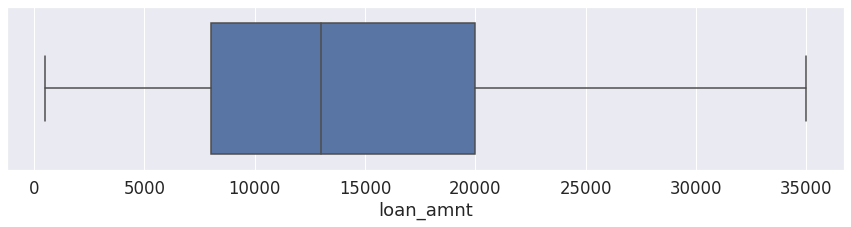

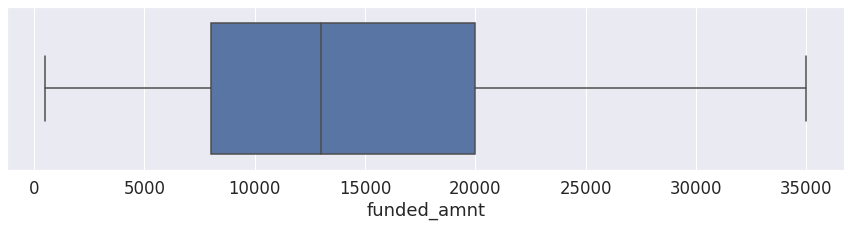

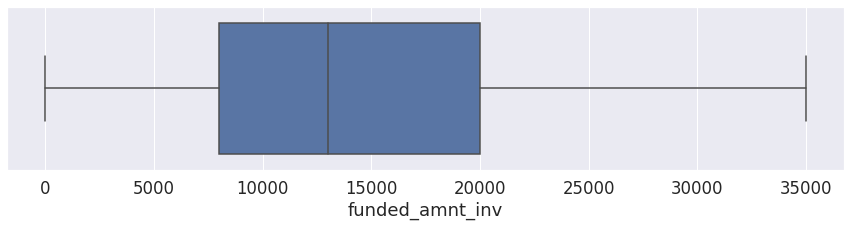

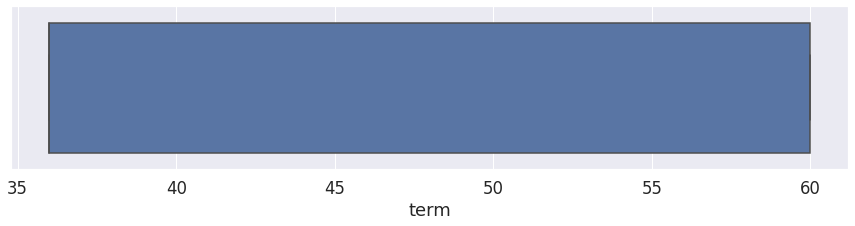

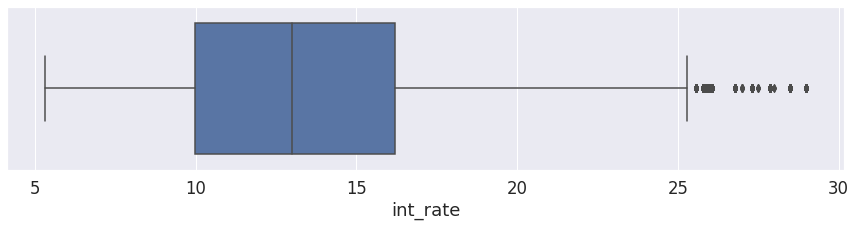

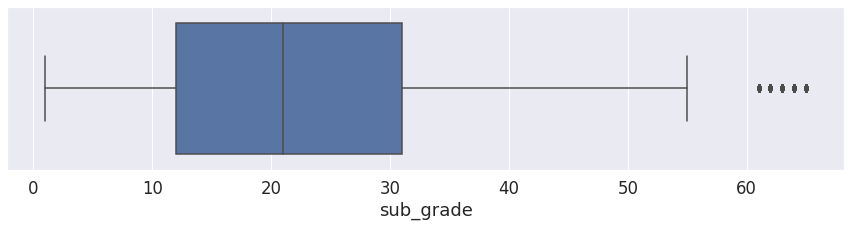

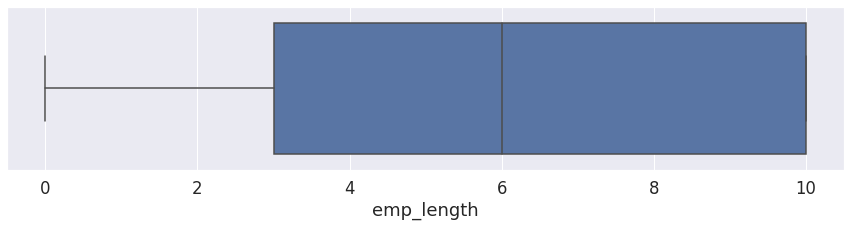

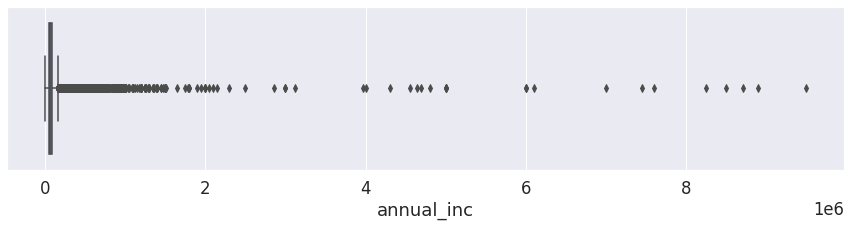

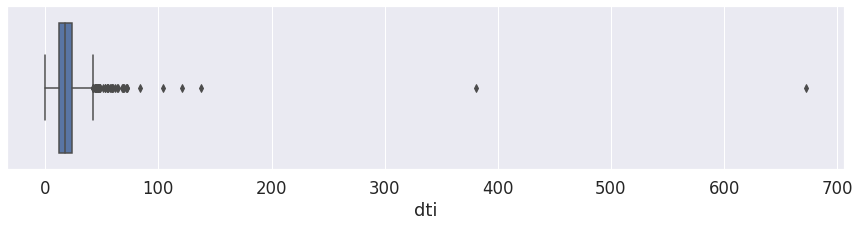

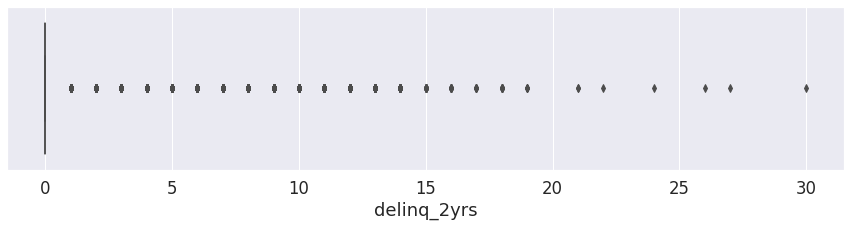

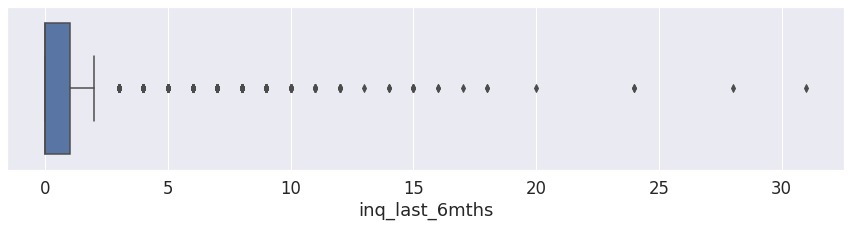

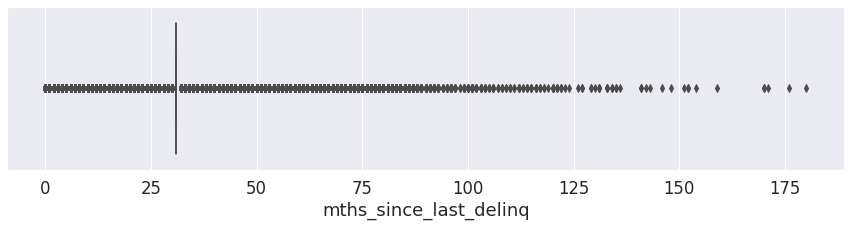

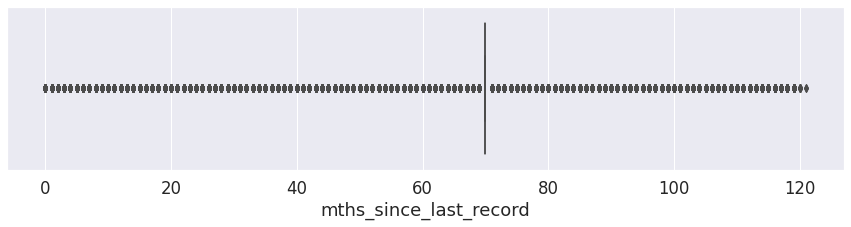

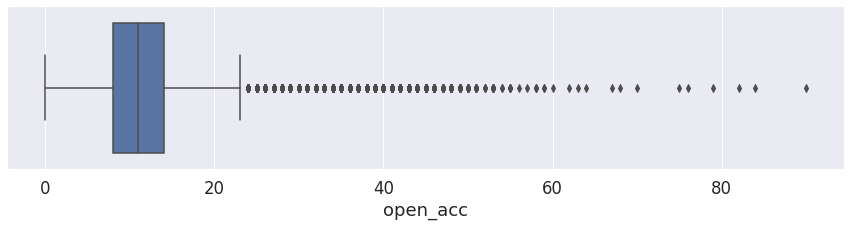

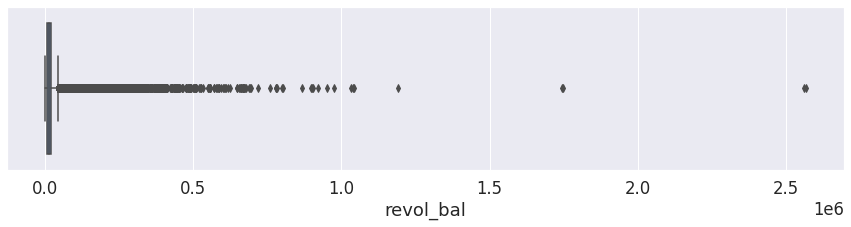

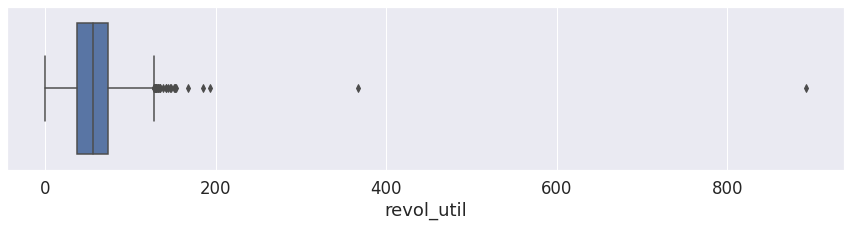

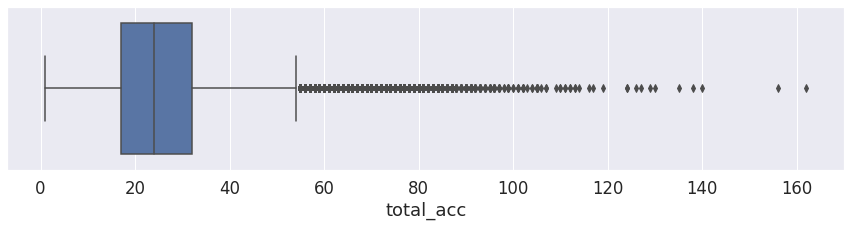

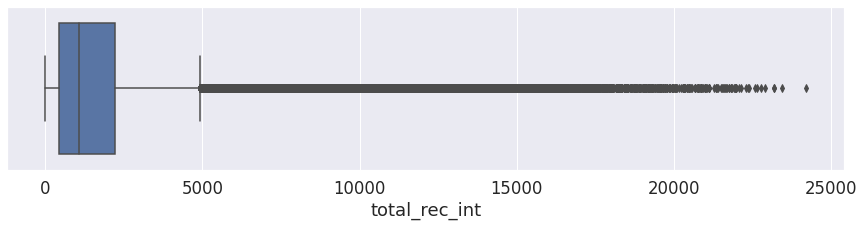

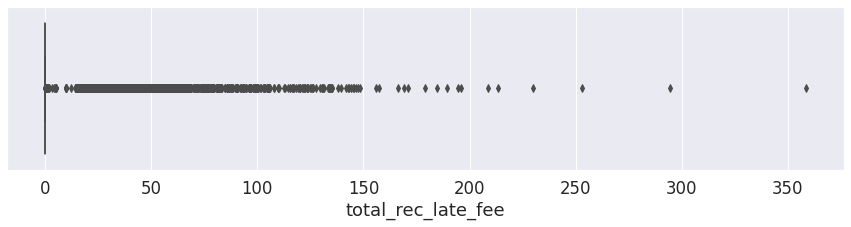

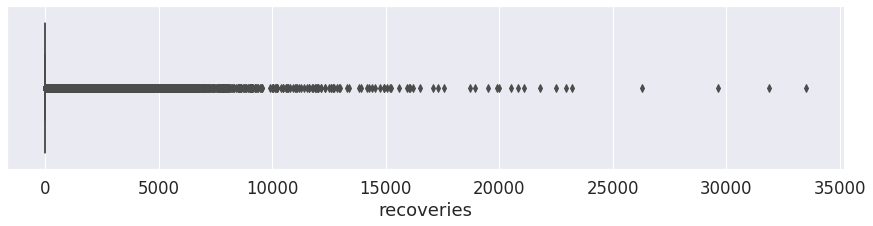

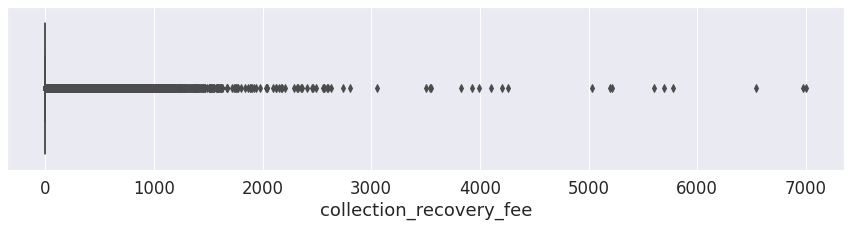

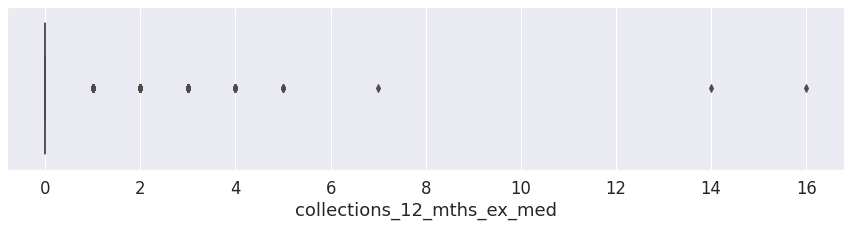

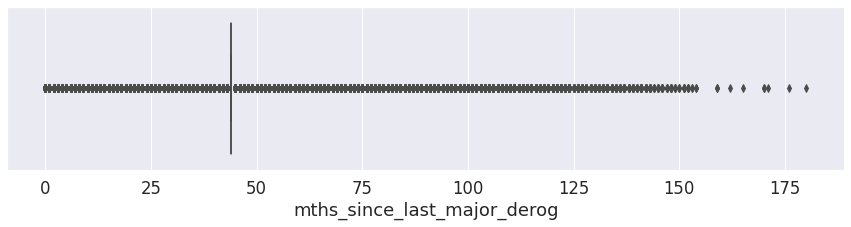

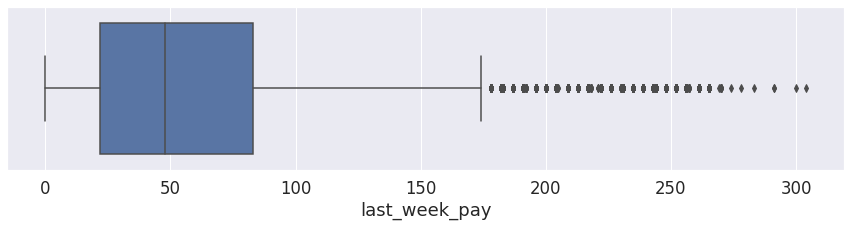

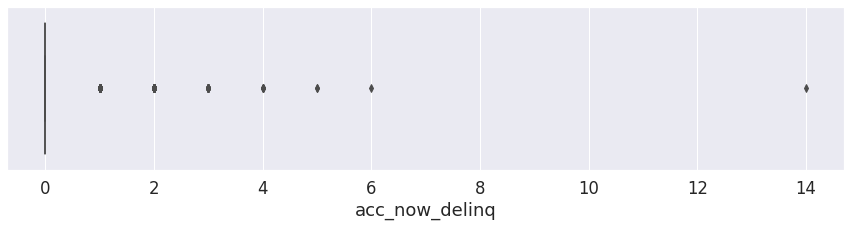

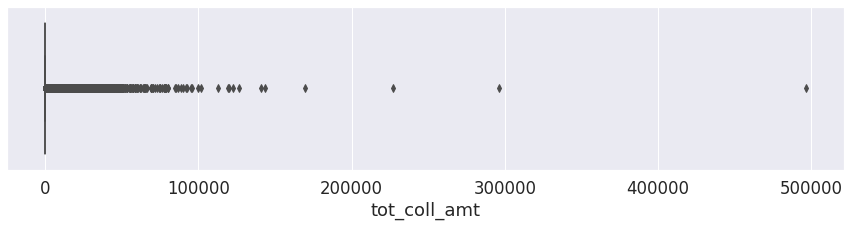

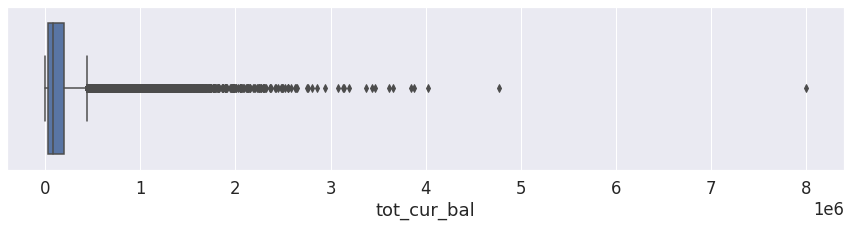

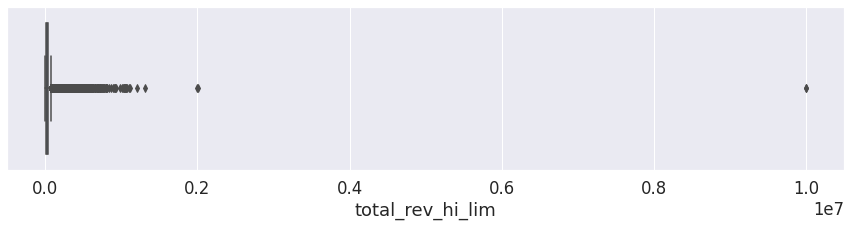

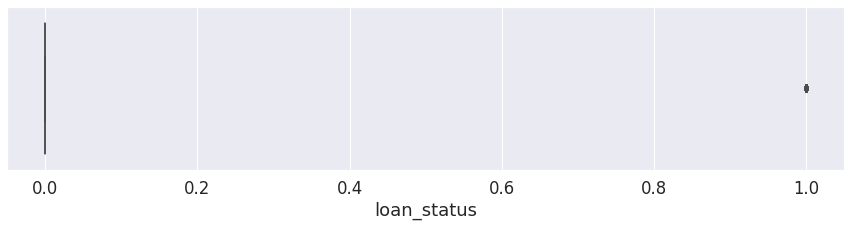

In [240]:
#boxplot of the training data
for col in numeric_cols:
    
    plt.figure(figsize=(15,3))
    sns.boxplot(x = df_train[col])
    plt.show()

In [241]:
#inter quartile range of the training data
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

member_id                      4.762232e+07
loan_amnt                      1.200000e+04
funded_amnt                    1.200000e+04
funded_amnt_inv                1.200000e+04
term                           2.400000e+01
int_rate                       6.210000e+00
sub_grade                      1.900000e+01
emp_length                     7.000000e+00
annual_inc                     4.500000e+04
dti                            1.202000e+01
delinq_2yrs                    0.000000e+00
inq_last_6mths                 1.000000e+00
mths_since_last_delinq         0.000000e+00
mths_since_last_record         0.000000e+00
open_acc                       6.000000e+00
revol_bal                      1.439900e+04
revol_util                     3.590000e+01
total_acc                      1.500000e+01
total_rec_int                  1.793135e+03
total_rec_late_fee             0.000000e+00
recoveries                     0.000000e+00
collection_recovery_fee        0.000000e+00
collections_12_mths_ex_med     0

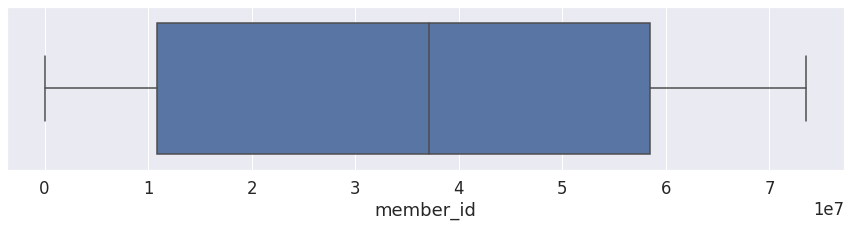

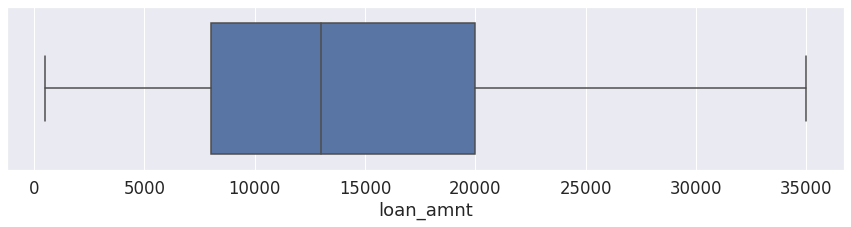

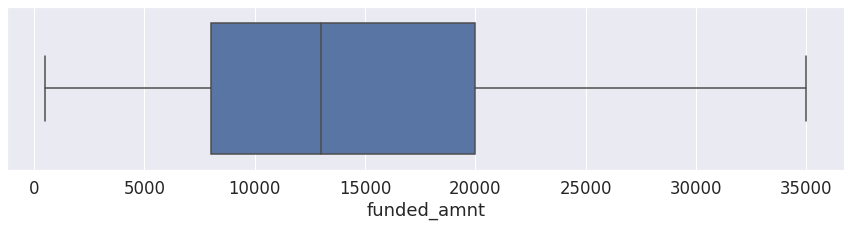

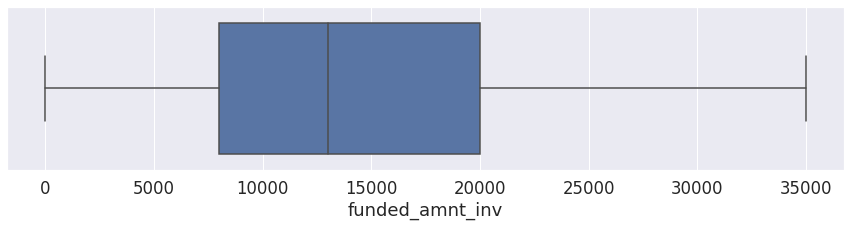

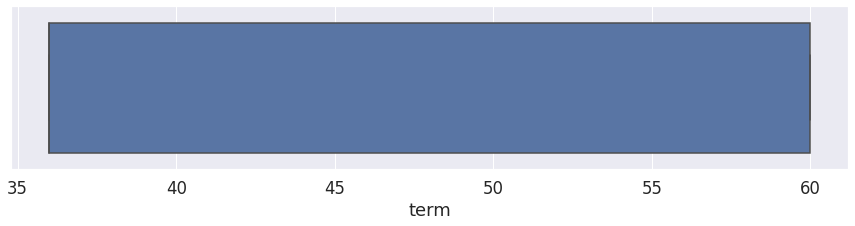

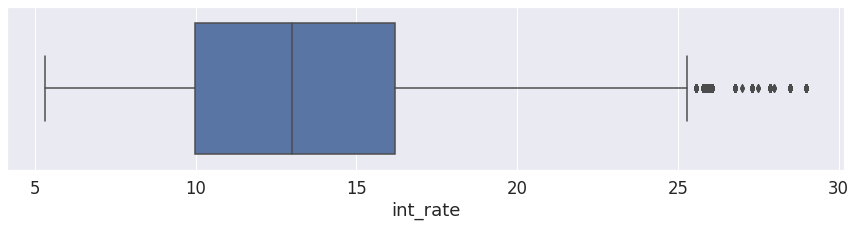

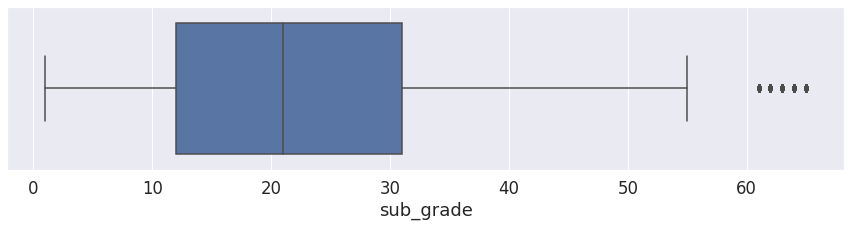

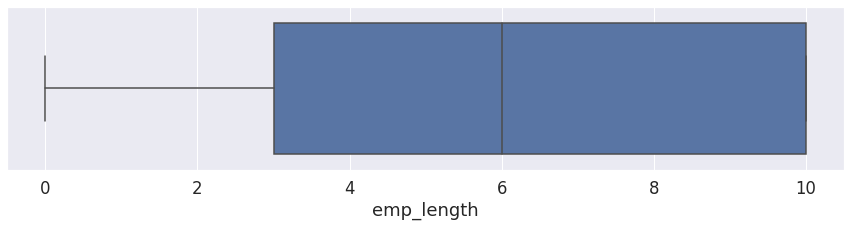

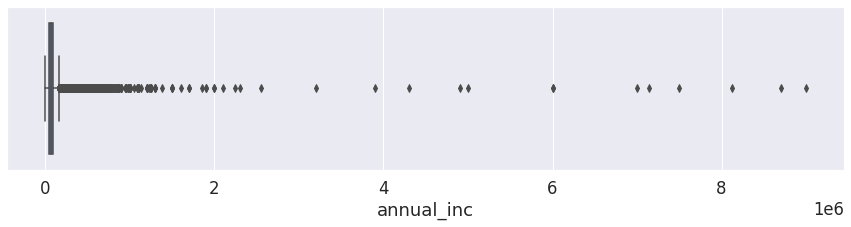

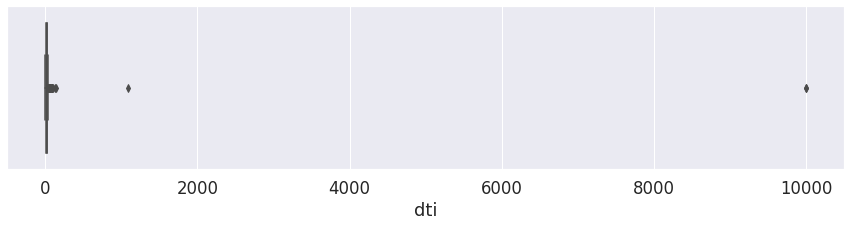

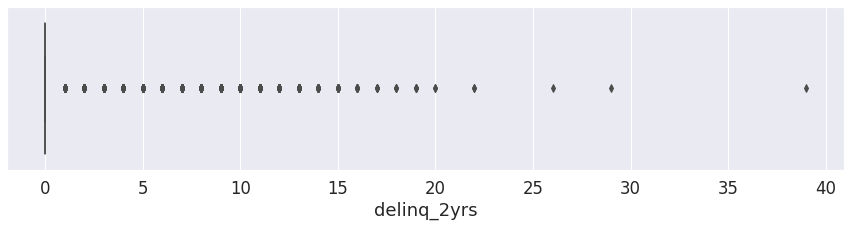

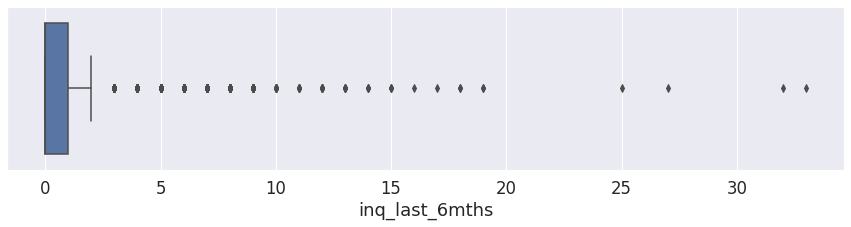

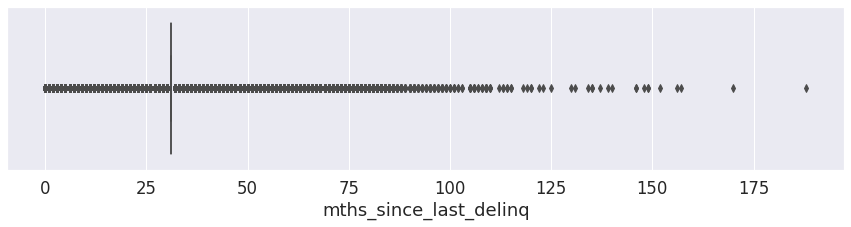

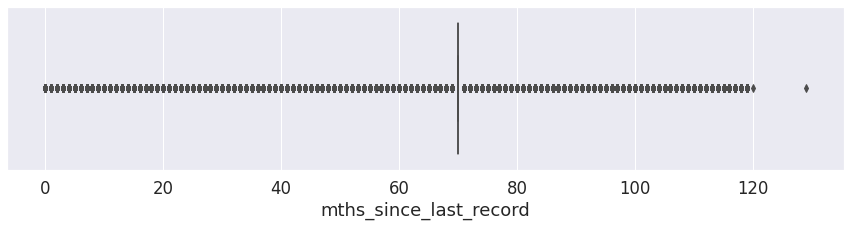

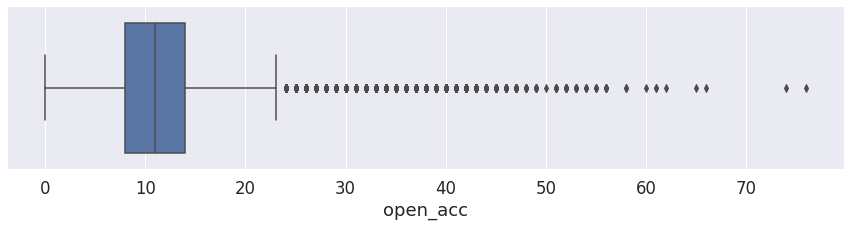

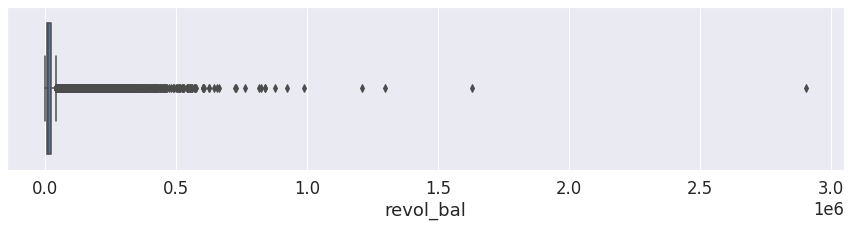

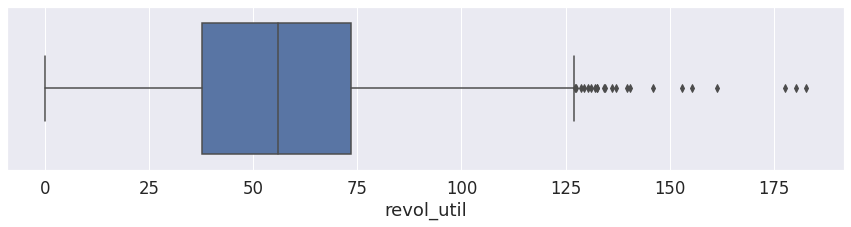

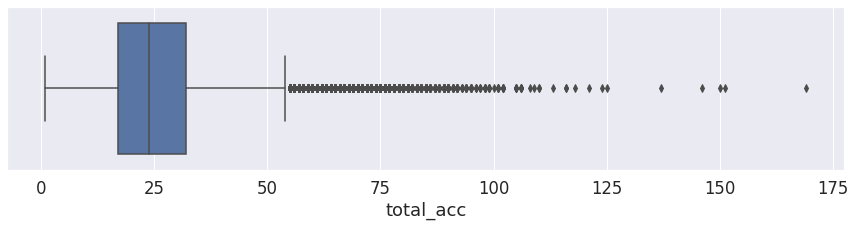

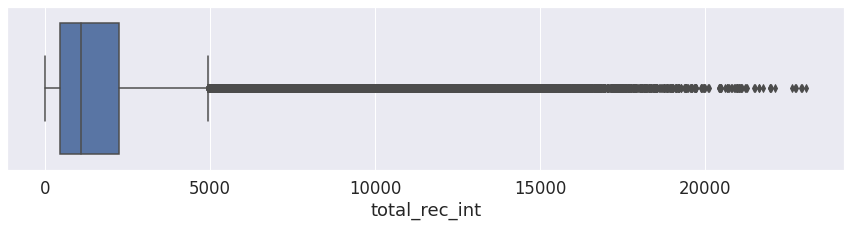

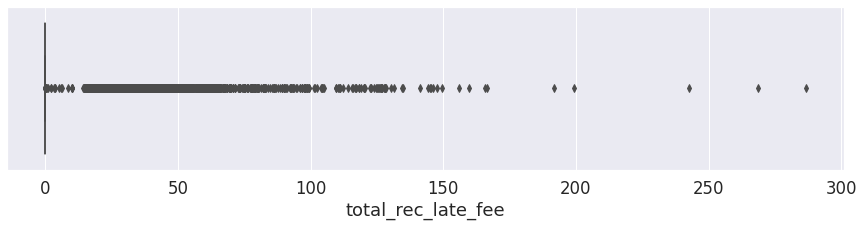

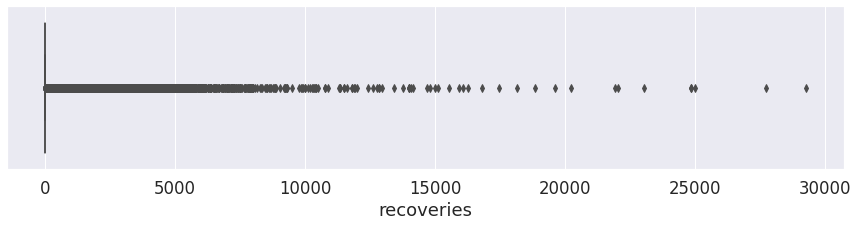

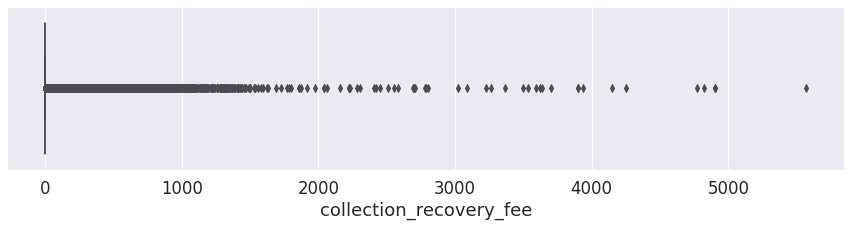

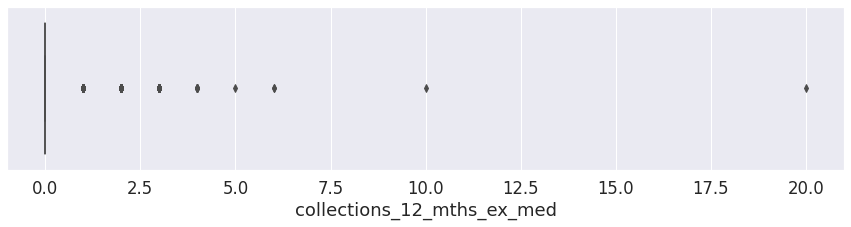

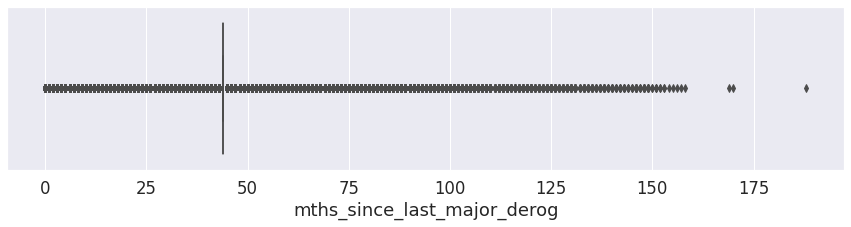

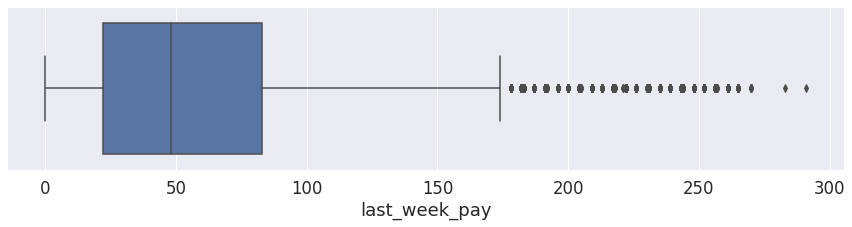

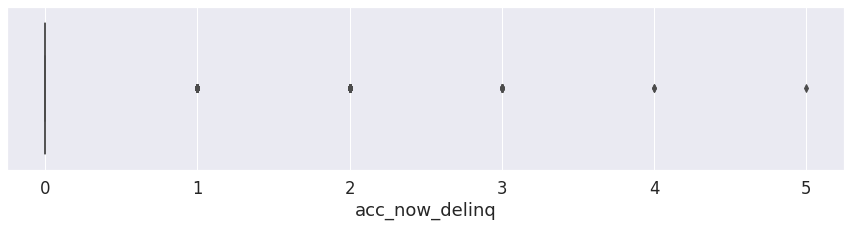

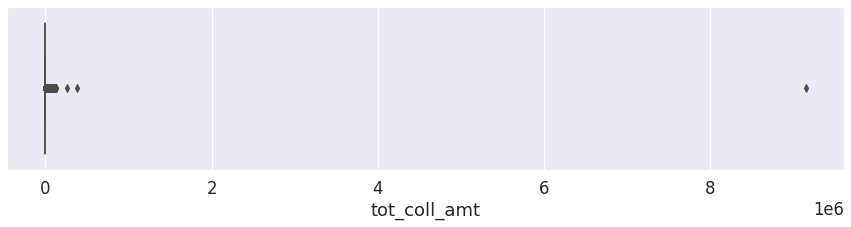

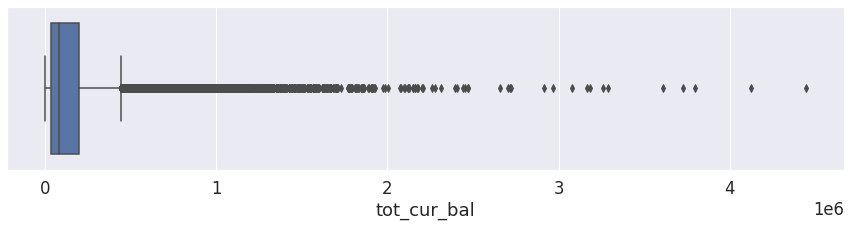

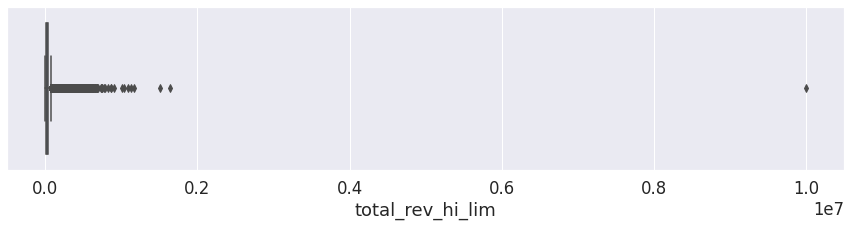

In [242]:
#boxplot of testing data
for col in numeric_col:
    
    plt.figure(figsize=(15,3))
    sns.boxplot(x = df_test[col])
    plt.show()

In [243]:
#inter quartile range of testing data
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

member_id                      47559512.00
loan_amnt                         12000.00
funded_amnt                       12000.00
funded_amnt_inv                   12000.00
term                                 24.00
int_rate                              6.21
sub_grade                            19.00
emp_length                            7.00
annual_inc                        45000.00
dti                                  12.05
delinq_2yrs                           0.00
inq_last_6mths                        1.00
mths_since_last_delinq                0.00
mths_since_last_record                0.00
open_acc                              6.00
revol_bal                         14370.00
revol_util                           35.80
total_acc                            15.00
total_rec_int                      1801.73
total_rec_late_fee                    0.00
recoveries                            0.00
collection_recovery_fee               0.00
collections_12_mths_ex_med            0.00
mths_since_

## Feature Extraction

In [244]:
#copying the independant variables into final dataframe 
df_train_final = df_train.copy()
df_train_final = df_train_final.drop(['loan_status'], axis=1)

In [245]:
# Calculating EMIs (monthly)
principal = df_train_final['loan_amnt']
rate = df_train_final['int_rate'] /(100*12)
time = df_train_final['term']

df_train_final['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) 
df_train_final['emi_paid_perc'] = np.round_(((df_train_final['last_week_pay'])/(df_train_final['term']/12*52+1))*100, decimals = 2)


# Total number of available/unused 'credit lines'
df_train_final['avl_lines'] = df_train_final['total_acc'] - df_train_final['open_acc']


# Interest paid so far
df_train_final['int_paid'] = df_train_final['total_rec_int'] + df_train_final['total_rec_late_fee']


In [246]:
#copying the test data
df_test_final = df_test.copy()

In [247]:
# Calculating EMIs (monthly)
#EMI = [P x R x (1+R)^N] / [(1+R)^N-1]
principal = df_test_final['loan_amnt']
rate = df_test_final['int_rate'] /(100*12)
time = df_test_final['term']

df_test_final['emi_per_month'] = np.round_((principal * rate * (1+rate)**time)/((1+rate)**(time)-1), decimals = 2)

# Calculating EMIs paid (in terms of percent) np.round_(in_array, decimals = 2)
df_test_final['emi_paid_perc'] = np.round_(((df_test_final['last_week_pay'])/(df_test_final['term']/12*52+1))*100, decimals = 2)


# Total number of available/unused 'credit lines'
df_test_final['avl_lines'] = df_test_final['total_acc'] - df_test_final['open_acc']


# Interest paid so far
df_test_final['int_paid'] = df_test_final['total_rec_int'] + df_test_final['total_rec_late_fee']

###Standardising the Dataset

In [248]:
#extracting numeric columns for standardising in training dataset
num_cols = df_train_final.select_dtypes(include=np.number).columns.tolist()


In [249]:
#standardising the training dataset
scaler = preprocessing.StandardScaler()
for col in num_cols:
  df_train_final[col] = scaler.fit_transform(df_train_final[col].values.reshape(-1,1))

    

In [250]:
#extracting numeric columns for standardising in testing dataset
num_col = df_test_final.select_dtypes(include=np.number).columns.tolist()


In [251]:
#standardising the testing dataset
scaler = preprocessing.StandardScaler()
for col in num_col:
  df_test_final[col] = scaler.fit_transform(df_test_final[col].values.reshape(-1,1))


###One Hot Encoding of the Dataset

In [252]:
#Creating dummy variables for the categorical columns in training dataset
df_train_final=pd.get_dummies(df_train_final, drop_first=True)
df_train_final

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emi_per_month,emi_paid_perc,avl_lines,int_paid,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_SourceVerified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,verification_status_joint_NotVerified,verification_status_joint_SourceVerified,verification_status_joint_Verified
0,0.961130,-0.048325,-0.046775,-0.042047,-0.654380,1.357892,1.700258,0.837133,-0.710584,1.880883,-0.365619,0.306308,1.139463,0.451137,0.462108,0.249461,0.756586,0.230742,-0.276892,-0.096529,-0.111603,-0.07698,-0.1075,2.701432,-0.726675,-0.063385,-0.104601,-0.714883,-0.016928,0.369510,-0.620201,0.030913,-0.277031,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.451229,-1.180592,-1.179750,-1.173391,-0.654380,-0.514423,-0.534941,-1.682688,-0.153832,-1.732423,-0.365619,0.306308,-0.097066,-0.001299,-1.044098,-0.414628,-1.335921,-1.035827,-0.797573,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,-1.113953,-0.063385,-0.104601,-0.840919,0.040463,-1.146563,-1.037826,-0.746742,-0.797621,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.461363,-0.564070,-0.562842,-0.557371,-0.654380,-1.366097,-1.305699,-1.122728,-0.460582,0.033604,-0.365619,-0.696676,-0.097066,-0.001299,-1.232374,-0.269555,-1.000449,-0.529199,-0.810702,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,-1.113953,-0.063385,-0.070038,-0.650294,0.095121,-0.520759,-1.037826,0.030913,-0.810747,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.372701,0.028740,0.030339,0.034956,-0.654380,1.478907,1.083651,1.117114,0.459669,-0.378628,-0.365619,1.309293,0.879141,-0.001299,-0.290995,-0.143123,0.018548,-0.360323,1.483468,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,1.756460,-0.063385,-0.104601,-0.534059,-0.183636,0.483870,2.057150,-0.302368,1.483016,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.133985,0.147302,0.148975,0.153421,-0.654380,-0.594338,-0.689092,1.117114,-0.353220,0.241512,-0.365619,-0.696676,-0.097066,-0.001299,-0.102719,0.843489,0.886581,0.146304,0.259403,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,0.867999,-0.063385,-0.104601,-0.590632,0.426706,0.343756,1.099273,0.253100,0.259168,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,-0.153775,0.621549,0.623520,0.627283,-0.654380,-0.171926,-0.457865,1.117114,-0.000457,-0.431203,-0.365619,-0.696676,-0.097066,-1.720554,0.085557,-0.051120,0.358213,0.737369,0.402265,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,0.161786,-0.063385,-0.104601,-0.348805,-0.180903,0.949251,0.337676,0.919661,0.402006,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532424,-0.232253,-0.326946,-0.325570,-0.320440,1.528163,0.398901,0.312893,1.117114,-0.245857,0.577273,-0.365619,-0.696676,-0.097066,0.994059,-0.290995,-0.333060,-0.082094,0.315180,0.205184,-0.096529,-0.111603,-0.07698,-0.1075,-0.002734,0.275691,-0.063385,-0.104601,0.625321,-0.372207,-0.621238,-0.224556,0.586381,0.204959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [253]:
#Creating dummy variables for the categorical columns in testing data
df_test_final=pd.get_dummies(df_test_final, drop_first=True)
df_test_final

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emi_per_month,emi_paid_perc,avl_lines,int_paid,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_SourceVerified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT,verification_status_joint_NotVerified,verification_status_joint_SourceVerified,verification_status_joint_Verified
0,-0.956746,-0.089104,-0.087568,-0.082760,1.526156,0.681286,0.310362,-0.561263,-0.023838,0.415728,0.792077,0.305170,-0.813623,-0.002170,0.835004,0.575422,0.429271,2.342865,1.028666,-0.097814,-0.1128,-0.077827,-0.106648,-0.001804,1.048406,-0.065784,-0.014508,-0.333431,0.406287,-0.387739,0.278393,2.589853,1.028291,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.165426,0.147947,0.149651,0.154113,1.526156,-0.857967,-0.690611,-0.281415,0.468823,0.516626,-0.363282,-0.694253,-0.097683,-0.002170,-0.667059,-0.568784,-1.499425,3.187718,-0.124754,-0.097814,-0.1128,-0.077827,-0.106648,-0.001804,-0.020564,-0.065784,-0.014508,2.095349,-0.283419,-0.413487,-0.415737,4.591992,-0.124922,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.290295,-0.438754,-0.437466,-0.432148,1.526156,0.537622,0.772350,1.117824,-0.199006,0.140842,0.792077,-0.694253,-0.618367,4.067045,-0.103785,-0.216477,0.794841,-0.445152,0.161701,-0.097814,-0.1128,-0.077827,-0.106648,-1.627070,0.275109,-0.065784,-0.014508,-0.194986,-0.428172,-0.698059,-0.223801,-0.524585,0.161481,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.100303,2.399931,2.403230,2.368879,1.526156,-0.128247,0.079368,1.117824,1.172624,-0.036325,-0.363282,-0.694253,-0.097683,-0.002170,1.773794,0.696721,-0.423725,0.061760,-0.000266,-0.097814,-0.1128,-0.077827,-0.106648,-0.001804,-0.816605,-0.065784,-0.014508,1.028886,1.164112,1.448430,-0.932577,-0.969505,-0.000456,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.021796,-0.978044,-0.977138,-0.971035,-0.655241,-1.450865,-1.383593,-0.281415,-0.360099,0.079668,-0.363282,-0.694253,-0.097683,-0.002170,0.835004,-0.525453,-1.507829,0.906614,-0.755108,-0.097814,-0.1128,-0.077827,-0.106648,-0.001804,-0.816605,-0.065784,-0.014508,0.672806,-0.132990,-0.968468,-0.717516,0.698944,-0.755162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,-0.657696,0.029422,0.031042,0.035677,-0.655241,-1.542080,-1.460591,-1.400807,0.347612,-0.227395,-0.363282,-0.694253,2.896249,-0.002170,0.083973,-0.210370,-1.150663,-0.107211,-0.274732,-0.097814,-0.1128,-0.077827,-0.106648,2.977850,0.570781,-0.065784,-0.014508,0.062791,0.358036,0.092947,0.780202,-0.190895,-0.274872,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
354947,0.469206,2.399931,2.403230,2.404410,1.526156,2.881848,3.236284,-1.400807,1.641824,-0.254407,1.947436,1.304593,-0.878708,-0.002170,1.773794,1.589858,0.265395,0.653158,2.264165,-0.097814,-0.1128,-0.077827,-0.106648,-0.001804,-0.429956,-0.065784,-0.014508,4.307831,1.541606,2.491548,-0.681672,-0.190895,2.263568,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35

In [254]:
#shape of the training dataset before one hot encoding
df_train.shape

(532428, 38)

In [255]:
#shape of the training dataset after one hot encoding
df_train_final.shape

(532428, 64)

##Modelling

In [256]:
#Assigning the X and Y with necessary variables 
X = df_train_final
y = df_train['loan_status']

### Train-Test Split of the data

In [257]:
#train test split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

###Cat Boost Classifier

In [258]:
# Cat Boost Classifier 
clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1400, subsample=0.70, max_depth=6, scale_pos_weight=2.5, silent=True)

In [259]:
# Training the Dataset
clf.fit(X_train, y_train)

In [260]:
y_train_pred = clf.predict(X_train)   

In [261]:
#Training score of the data
clf.score(X_train, y_train)

0.9444431028792671

In [262]:
#predictioning the test data
y_predict = clf.predict(X_test)

In [263]:
#Testing accuracy
clf.score(X_test,y_test)

0.9386398211971527

##Evaluation Metrics

### Confusion Matrix

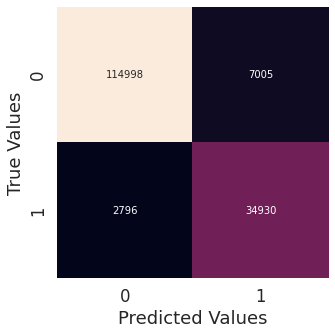

In [264]:
#confusion Matrix 
conf_mat = confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show();

### Classification Report

In [265]:
#classification Report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    122003
           1       0.83      0.93      0.88     37726

    accuracy                           0.94    159729
   macro avg       0.90      0.93      0.92    159729
weighted avg       0.94      0.94      0.94    159729



###AUC-ROC  Curve

ROC-AUC: 93.4235017757%




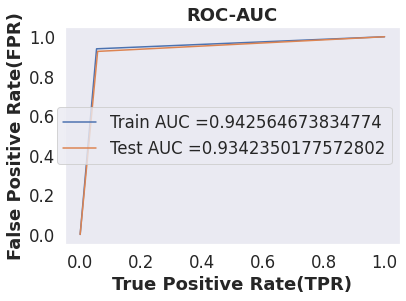

In [266]:
#ROC Curve
accuracy_per_roc_auc = roc_auc_score(y_test, y_predict)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
print('\n')
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)", fontweight='bold')
plt.ylabel("False Positive Rate(FPR)", fontweight='bold')
plt.title("ROC-AUC", fontweight='bold')
plt.grid()
plt.show()

####Interpretation :According to the above ROC-AUC curve The model has predicted 94% accurately in the training dataset and 93% accurately in the testing dataset. Therefore the probability that the member who applied for the loan can be a defaulter is (1-0.93)= 7%.

###Predicting the labels for testing dataset 

In [267]:
#Assigning the Xtest variable
X_test = df_test_final


In [268]:
#predicting for new dataset
result = clf.predict(X_test)

In [269]:
#importing the labels into excel file
pd.DataFrame({"Id": np.arange(len(result)), "Category": result}).astype(int).to_csv(
    "CATBoost.csv", index=False)